In [1]:
!pip install keras

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/59/a8/d94e8acb59d678d908fe1db0c7ad89dfa2c2e2e529eeb3c2b3cc218a758d/keras-3.1.1-py3-none-any.whl.metadata
  Obtaining dependency information for absl-py from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for rich from https://files.pythonhosted.org/packages/87/67/a37f6214d0e9fe57f6ae54b2956d550ca8365857f42a1ce0392bb21d9410/rich-13.7.1-py3-none-any.whl.metadata
  Obtaining dependency information for namex from https://files.pythonhosted.org/packages/cd/43/b971880e2eb45c0bee2093710ae8044764a89afe9620df34a231c6f0ecd2/namex-0.0.7-py3-none-any.whl.metadata
  Obtaining dependency information for optree from https://files.pythonhosted.org/packages/8f/db/e05a35451d4ba30fdc65ef168dfdc68a6939ea6afdc0101e3e77f97e1547/optree-0.11.0-cp311-cp311-win_amd64.whl.metadata
     -----

In [2]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2dbd0ad4182ef2d53488bb02e58694cd79d61369e85900/flatbuffers-24.3.25-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/p

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

In [4]:
df= pd.read_csv('concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.shape

(1030, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [7]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
df.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [9]:
x_org= df.drop('Strength', axis=1).values
y_org=df['Strength'].values

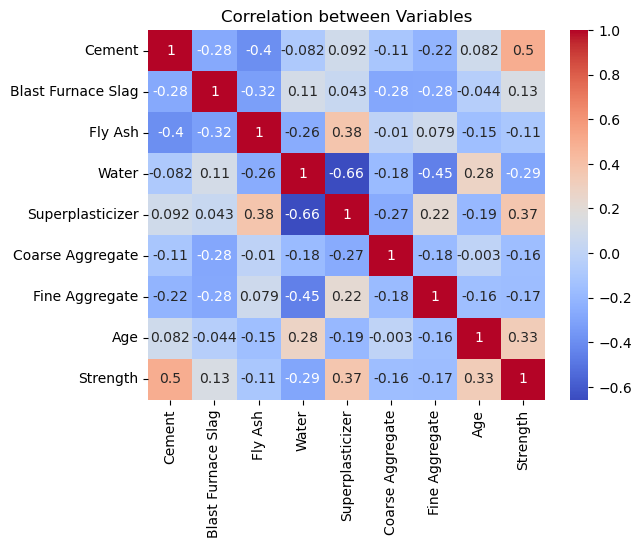

In [10]:
# Assuming df is your dataframe
corr = df.corr()
# Plot the heatmap
sns.heatmap(corr, yticklabels=True, annot=True, cmap='coolwarm')
# Add a title to the plot
plt.title('Correlation between Variables')
# Show the plot
plt.show()

C:\Users\kr754\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


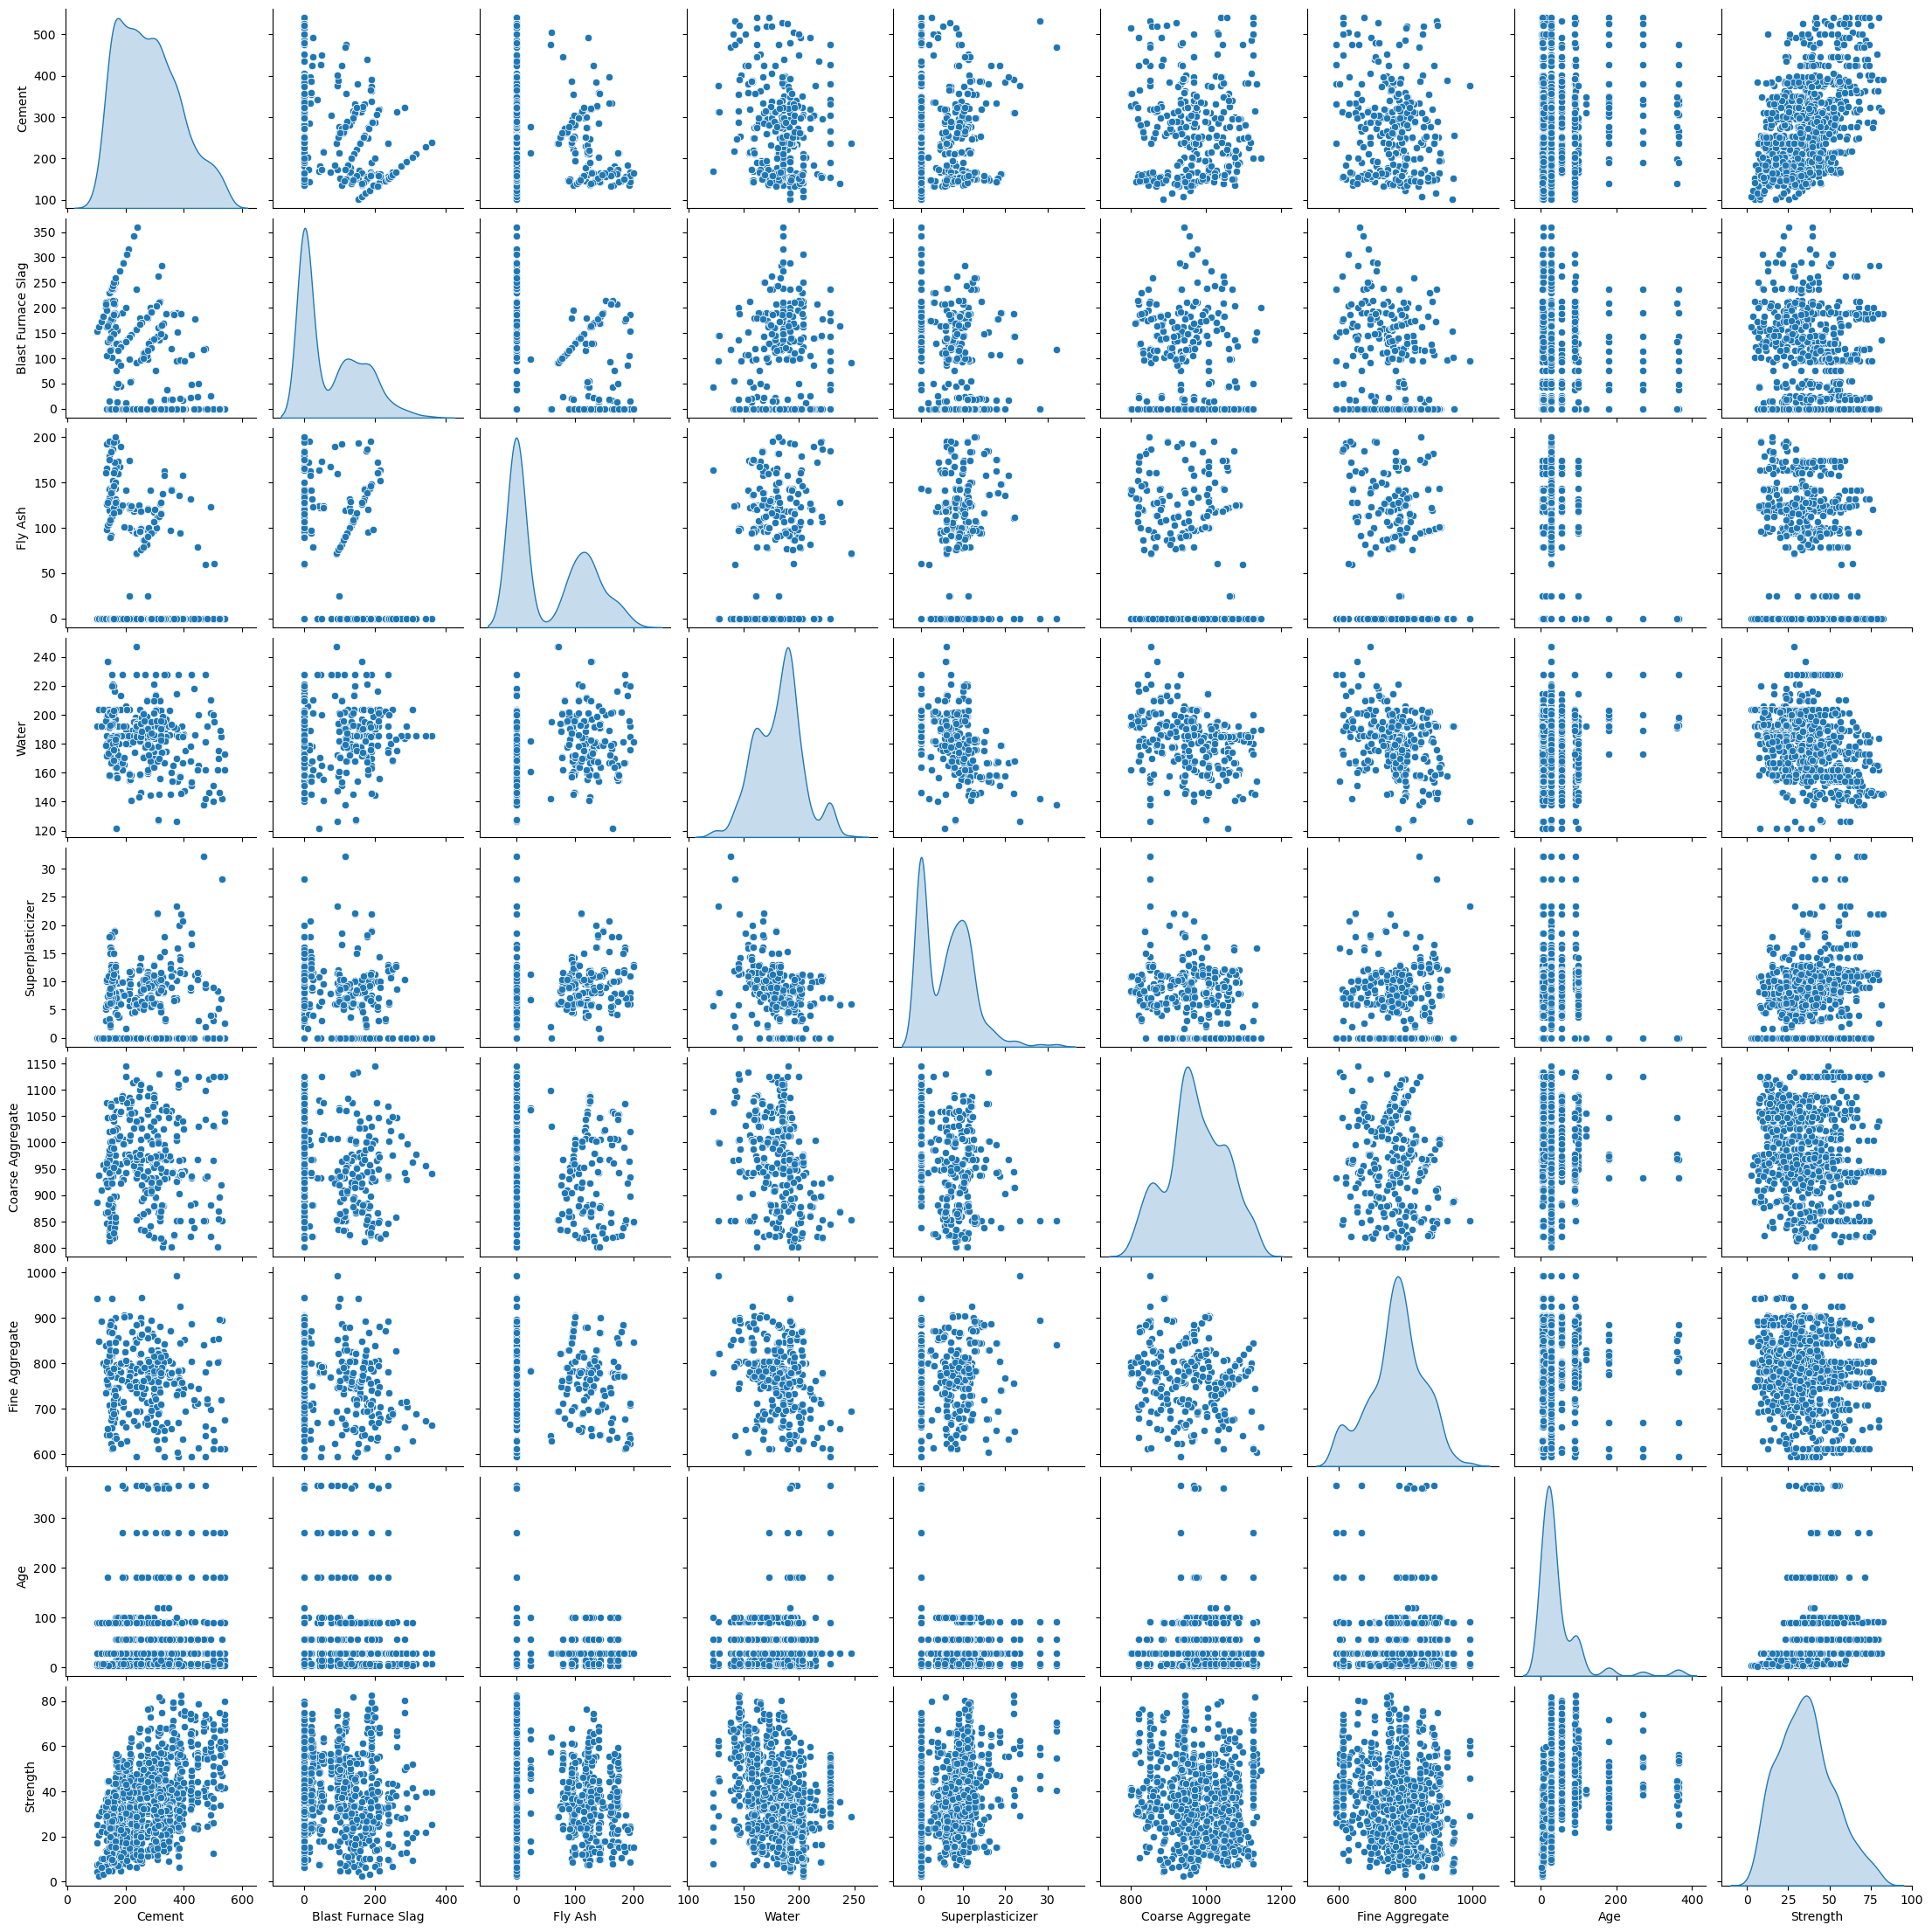

In [11]:
sns.pairplot(df, diag_kind='kde')

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x_org, y_org, test_size= 0.3, random_state=1)

In [13]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from keras import backend

In [15]:
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true),axis =-1))

In [18]:
import tensorflow as tf
model=Sequential()
model.add(Dense(64,input_dim=8,activation='relu'))

model.add(Dense(32,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(Dense(1,activation='linear'))

In [20]:
import keras
from keras.metrics import RootMeanSquaredError

# Define the optimizer
opt = keras.optimizers.Adam(learning_rate=0.0015)

# Compile the model
model.compile(optimizer=opt, loss='mean_squared_error', metrics=[RootMeanSquaredError()])

# Fit the model
history = model.fit(X_train, y_train, epochs=35, batch_size=32, validation_split=0.1)

# Print model summary
print(model.summary())


Epoch 1/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 1514.8765 - root_mean_squared_error: 38.9321 - val_loss: 1647.9877 - val_root_mean_squared_error: 39.1247
Epoch 2/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1458.6523 - root_mean_squared_error: 38.1953 - val_loss: 1579.8599 - val_root_mean_squared_error: 38.3037
Epoch 3/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1324.2344 - root_mean_squared_error: 36.3798 - val_loss: 1511.6847 - val_root_mean_squared_error: 37.4862
Epoch 4/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1270.6139 - root_mean_squared_error: 35.6291 - val_loss: 1451.7163 - val_root_mean_squared_error: 36.7677
Epoch 5/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1214.9376 - root_mean_squared_error: 34.8587 - val_loss: 1400.5411 - val_root_mean_squared_error: 36.1674
Epoch 6/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1234.8179 - root_mean_squared_error: 35.1134 - val_loss: 1368.7150 - val_root_mean_squared_error: 35.7912
Epoch 7/35
21/2

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,325 (32.52 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 64 (256.00 B)

 Optimizer params: 5,508 (21.52 KB)

None


In [21]:
y_predict=model.predict(X_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_predict))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
0.8535764768791196


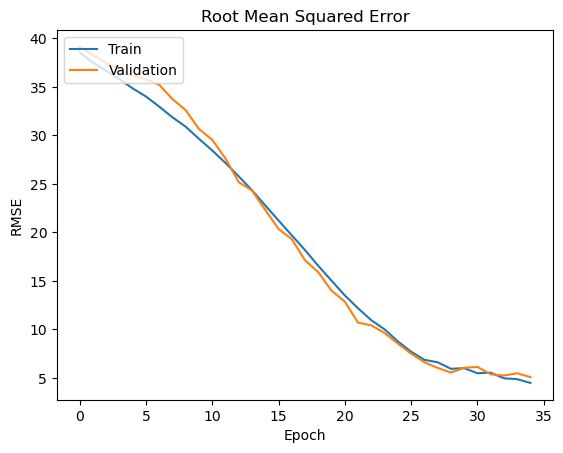

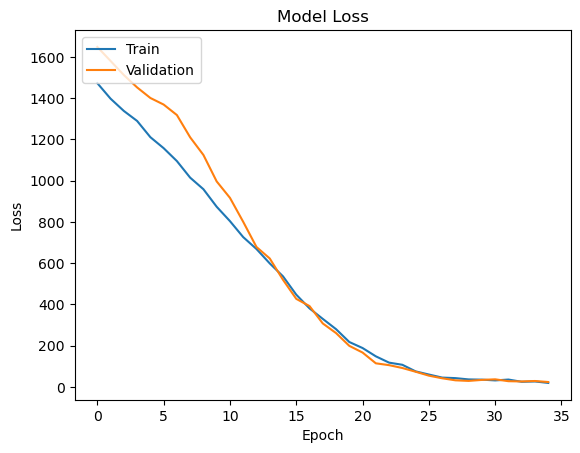

Final RMSE on validation set: 5.074686050415039


In [25]:
import matplotlib.pyplot as plt

# Plot RMSE
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Root Mean Squared Error')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Calculate additional error metrics
final_val_rmse = history.history['val_root_mean_squared_error'][-1]
print("Final RMSE on validation set:", final_val_rmse)
